In [14]:
import skimage.io
import skimage.feature
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw
from skimage import measure,data,color

In [10]:
import cv2
from skimage import morphology
import numpy as np


img = cv2.imread(r'C:\Users\vghuser\Desktop\test_1.jpg')
_,binary = cv2.threshold(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),127,255,0)
#cv2.imwrite(r'C:\Users\vghuser\Desktop\test_1111.jpg',binary)

binary[binary==255] = 1
skeleton0 = morphology.skeletonize(binary)
skeleton = skeleton0.astype(np.uint8)*255
cv2.imwrite(r'C:\Users\vghuser\Desktop\test_1b.jpg',skeleton)


True

{'m00': 547600.0, 'm10': 202612000.0, 'm01': 202612000.0, 'm20': 99955253333.33333, 'm11': 74966440000.0, 'm02': 99955253333.33333, 'm30': 55475165600000.0, 'm21': 36983443733333.336, 'm12': 36983443733333.336, 'm03': 55475165600000.0, 'mu20': 24988813333.33333, 'mu11': 0.0, 'mu02': 24988813333.33333, 'mu30': 0.0, 'mu21': 0.00390625, 'mu12': 0.00390625, 'mu03': 0.0, 'nu20': 0.08333333333333331, 'nu11': 0.0, 'nu02': 0.08333333333333331, 'nu30': 0.0, 'nu21': 1.7603597743924535e-17, 'nu12': 1.7603597743924535e-17, 'nu03': 0.0}
輪廓所包含的面積： 547600.0
輪廓的周長： 2960.0


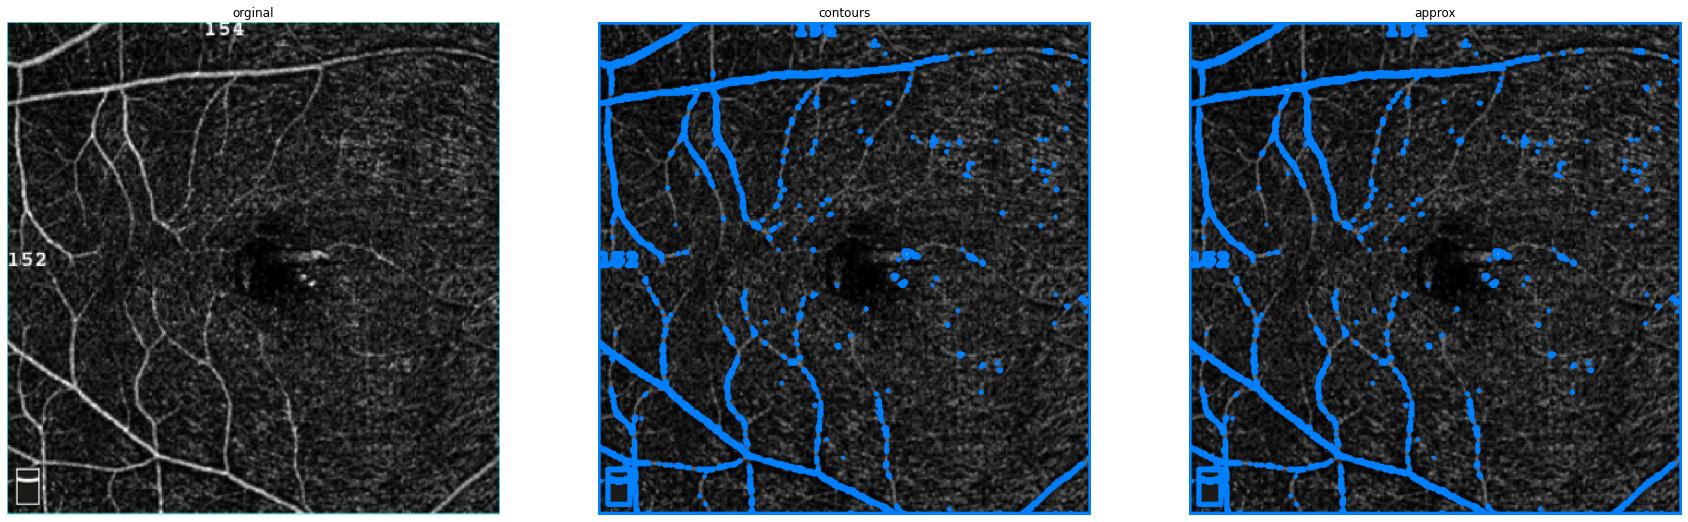

In [18]:
plt.figure(num = 'OCTA' ,figsize=(30, 10))

img = skimage.io.imread(r'C:\Users\vghuser\Desktop\test_1.jpg')#, as_grey=True)

plt.subplot(1, 3, 1)
plt.title('orginal')
plt.imshow(img)
plt.axis('off')

ret,thresh = cv2.threshold(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),127,255,0)
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)#得到輪廓訊息
cnt = contours[0]#取第一條輪廓
M = cv2.moments(cnt)#計算第一條輪廓的矩
print(M)


imgnew = cv2.drawContours(img, contours, -1, (0, 127, 255), 5)#把所有輪廓畫出来
#cv2.imshow('contours', imgnew)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.subplot(1, 3, 2)
plt.title('contours')
plt.imshow(imgnew)
plt.axis('off')
#計算輪廓所包含的面積
area = cv2.contourArea(cnt)
print('輪廓所包含的面積：', area)

#計算輪廓的周長
perimeter = cv2.arcLength(cnt,True)
print('輪廓的周長：', perimeter)

#輪廓的近似
epsilon = 0.02*perimeter
approx = cv2.approxPolyDP(cnt,epsilon,True)
imgnew1 = cv2.drawContours(img, approx, -1, (0,127,255), 3)

plt.subplot(1, 3, 3)
plt.title('approx')
plt.imshow(imgnew1)
plt.axis('off')
plt.savefig("C:/Users/vghuser/Desktop/opencv_octa.jpg")
plt.show()


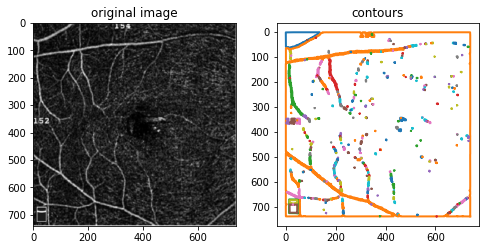

In [14]:
im = skimage.io.imread(r'C:\Users\vghuser\Desktop\test_1.jpg')#, as_grey=True)
im = color.rgb2gray(im)
#im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#im = im.flatten()
#im = np.array(im.reshape(741,741),order='F')
contours = measure.find_contours(im, 0.5)
#繪製輪廓
fig, axes = plt.subplots(1,2,figsize=(8,8))
ax0, ax1= axes.ravel()
ax0.imshow(im,plt.cm.gray)
ax0.set_title('original image')

rows,cols=im.shape
ax1.axis([0,rows,cols,0])
for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax1.axis('image')
ax1.set_title('contours')
plt.savefig("C:/Users/vghuser/Desktop/contours.jpg")
plt.show()

In [5]:
plt.figure(num = 'OCTa' ,figsize=(10, 10))

im = skimage.io.imread(r'C:\Users\vghuser\Desktop\test_1.jpg')#, as_grey=True)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = im.flatten()
im = np.array(im.reshape(741,741),order='F')
#print(im)

im = skimage.img_as_ubyte(im)

g = skimage.feature.greycomatrix(im, [1], [0], symmetric=False, normed=True)
print(g)

[[[[1.92398877e-03]]

  [[7.62300762e-04]]

  [[4.19447788e-04]]

  ...

  [[0.00000000e+00]]

  [[0.00000000e+00]]

  [[0.00000000e+00]]]


 [[[7.78713937e-04]]

  [[6.34642740e-04]]

  [[5.39811066e-04]]

  ...

  [[0.00000000e+00]]

  [[0.00000000e+00]]

  [[0.00000000e+00]]]


 [[[3.88445125e-04]]

  [[4.97866287e-04]]

  [[7.40416530e-04]]

  ...

  [[0.00000000e+00]]

  [[0.00000000e+00]]

  [[0.00000000e+00]]]


 ...


 [[[0.00000000e+00]]

  [[0.00000000e+00]]

  [[0.00000000e+00]]

  ...

  [[1.09421162e-05]]

  [[2.55316045e-05]]

  [[1.45894883e-05]]]


 [[[0.00000000e+00]]

  [[0.00000000e+00]]

  [[0.00000000e+00]]

  ...

  [[2.55316045e-05]]

  [[4.19447788e-05]]

  [[2.18842324e-05]]]


 [[[0.00000000e+00]]

  [[0.00000000e+00]]

  [[0.00000000e+00]]

  ...

  [[3.64737207e-06]]

  [[1.64131743e-05]]

  [[3.64737207e-05]]]]


C:\Users\vghuser\anaconda3\envs\aienv\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')


<Figure size 720x720 with 0 Axes>

C:\Users\vghuser\anaconda3\envs\aienv\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\vghuser\anaconda3\envs\aienv\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\vghuser\anaconda3\envs\aienv\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\vghuser\anaconda3\envs\aienv\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  remov

contrast： 283.07794616478833
energy： 0.028804675752053206
homogeneity： 0.2735039920808928
correlation： 0.8816117665002935
結構張量的特徵值： [[0.00230965]]
使用平方差和計算結構張量： [2.82468149e-06 3.06407651e-06 2.26779057e-06 1.52659778e-06
 9.82801392e-07 5.60119159e-07 2.91270007e-07 1.50916731e-07
 8.11944215e-08 4.72331734e-08 3.23238413e-08 2.46111151e-08
 1.86254947e-08 1.42767940e-08 1.10925396e-08 8.40757840e-09
 6.47338601e-09 4.95449308e-09 3.62214044e-09 2.88445188e-09
 2.61636523e-09 2.39504508e-09 2.00749462e-09 1.45995031e-09
 9.53345306e-10 6.14815214e-10 4.15455156e-10 2.91220156e-10
 2.15335547e-10 1.75159362e-10 1.45382102e-10 1.30702756e-10
 1.28400681e-10 1.18905659e-10 1.11221273e-10 1.09467701e-10
 9.53900975e-11 7.06669322e-11 4.37205231e-11 2.22369993e-11
 1.28197378e-11 1.51203616e-11 2.56552625e-11 3.37381671e-11
 2.85938920e-11 1.72263942e-11 1.28079354e-11 1.33820366e-11
 1.03296990e-11 5.37976675e-12 2.95371383e-12 2.40109753e-12
 1.62754376e-12 6.91731274e-13 2.95650273e-13 

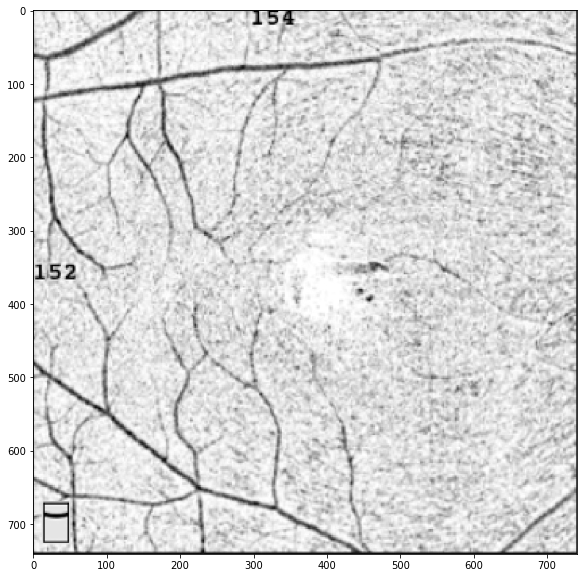

C:\Users\vghuser\anaconda3\envs\aienv\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U1')) -> None

In [32]:
plt.figure(num = 'OCTa' ,figsize=(10, 10))

f=open ('C:/Users/vghuser/Desktop/octa.csv', 'a')


im = skimage.io.imread(r'C:\Users\vghuser\Desktop\test_1.jpg')#, as_grey=True)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = im.flatten()
im = np.array(im.reshape(741,741),order='F')
#print(im)

im = skimage.img_as_ubyte(im)

g = skimage.feature.greycomatrix(im, [1], [0], symmetric=False, normed=True)
print ('contrast：', skimage.feature.greycoprops(g, 'contrast')[0][0])
print ('energy：', skimage.feature.greycoprops(g, 'energy')[0][0])
print ('homogeneity：', skimage.feature.greycoprops(g, 'homogeneity')[0][0])
print ('correlation：', skimage.feature.greycoprops(g, 'correlation')[0][0])
#print(skimage.feature.canny(g))#, sigma=1.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False))
#plt.imshow(g.squeeze())
#plt.show()
#計算結構張量的特徵值
print('結構張量的特徵值：', skimage.feature.structure_tensor_eigenvalues(g)[0][0])
print('使用平方差和計算結構張量：', skimage.feature.structure_tensor(g)[0][0])
print('FAST角點：', skimage.feature.corner_fast( g , n =12, threshold =0.15))

plt.imshow(im.squeeze(), cmap=plt.cm.gray_r)
plt.savefig("C:/Users/vghuser/Desktop/test_1pp.jpg")
plt.show()


f.write(str('contrast：', skimage.feature.greycoprops(g, 'contrast')[0][0] + '\n'))
f.write(str('energy：', skimage.feature.greycoprops(g, 'energy')[0][0] + '\n'))
f.write(str('homogeneity：', skimage.feature.greycoprops(g, 'homogeneity')[0][0] + '\n'))
f.write(str('correlation：', skimage.feature.greycoprops(g, 'correlation')[0][0] + '\n'))
#print(skimage.feature.canny(g))#, sigma=1.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False))
#plt.imshow(g.squeeze())
#plt.show()
#計算結構張量的特徵值。
f.write(str('結構張量的特徵值：', skimage.feature.structure_tensor_eigenvalues(g)[0][0] + '\n'))
f.write(str('使用平方差和計算結構張量：', skimage.feature.structure_tensor(g)[0][0] + '\n'))
f.write(str('FAST角點：', skimage.feature.corner_fast( g , n =12, threshold =0.15) + '\n'))
f.close()

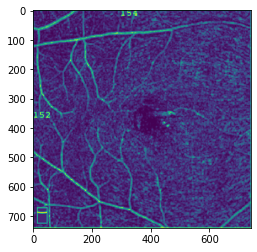

[[152   0   0 ...   0   0  63]
 [  0   3   1 ...   1   3   0]
 [  0   1  76 ...  17   1   0]
 ...
 [  0   2   1 ...   1   2   0]
 [  3   0   0 ...   0   0   4]
 [  0  23  70 ...  84  55   0]]


In [1]:
import numpy as np
import cv2
from skimage import color
import matplotlib.pyplot as plt
import imageio
import os
import csv
import pandas as pd

f=open ('C:/Users/vghuser/Desktop/octa曲率.csv', 'a')
f.write('曲率'+'\n')
#計算圖像曲率

img = cv2.imread(r'C:\Users\vghuser\Desktop\test_1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.flatten()
img = np.array(img.reshape(741,741),order='F')

x , y = np.gradient(img)
xx, xy = np.gradient(x)
yx, yy = np.gradient(y)
Iup =  (1 + x * x) * yy - 2 * x * y * xy + (1 + y * y) * xx
Idown = np.power((2 * (1 + x * x + y * y)),1.5)
final = Iup / Idown
final = abs(final)
final = (final - final.min()) / (final.max() - final.min())
final = final * 255
final = final.astype(np.uint8)   
plt.imshow(img)
#保存图像
plt.savefig("C:/Users/vghuser/Desktop/test_1ppp.png")
plt.show()
print(final)
f.write(str(final))
f.close()

C:\Users\vghuser\anaconda3\envs\aienv\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


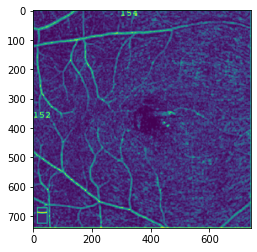

In [4]:
import numpy as np
import os
import csv
import pandas as pd

f=open ('C:/Users/vghuser/Desktop/octa曲率半徑.csv', 'a')
f.write('曲率半徑'+'\n')

im = skimage.io.imread(r'C:\Users\vghuser\Desktop\test_1.jpg')#, as_grey=True)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = im.flatten()
im = np.array(im.reshape(741,741),order='F')

#計算曲率半徑
def calculate_curvature(x_value: np.ndarray, y_value: np.ndarray):
    x_t = np.gradient(x_value)
    y_t = np.gradient(y_value)
    xx_t = np.gradient(x_t)
    yy_t = np.gradient(y_t)
    curvature_val = np.abs(xx_t * y_t - x_t * yy_t) / (x_t * x_t + y_t * y_t) ** 1.5
    return curvature_val

if __name__ == '__main__':
    array = im
    x = array[0]
    y = array[1]
    cur = calculate_curvature(x, y)
    #print('曲率：', cur)
    plt.imshow(im)
    plt.show()
    f.write(str(cur))
    f.close()